In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
using JSON

cross_validation_best_key_Oct_AM = readall("../temp_files/cross_validation_best_key_Oct_AM.json")
cross_validation_best_key_Oct_AM = JSON.parse(cross_validation_best_key_Oct_AM)

cross_validation_best_key_Oct_MD = readall("../temp_files/cross_validation_best_key_Oct_MD.json")
cross_validation_best_key_Oct_MD = JSON.parse(cross_validation_best_key_Oct_MD)

cross_validation_best_key_Oct_PM = readall("../temp_files/cross_validation_best_key_Oct_PM.json")
cross_validation_best_key_Oct_PM = JSON.parse(cross_validation_best_key_Oct_PM)

cross_validation_best_key_Oct_NT = readall("../temp_files/cross_validation_best_key_Oct_NT.json")
cross_validation_best_key_Oct_NT = JSON.parse(cross_validation_best_key_Oct_NT)

cross_validation_best_key_Oct_weekend = readall("../temp_files/cross_validation_best_key_Oct_weekend.json")
cross_validation_best_key_Oct_weekend = JSON.parse(cross_validation_best_key_Oct_weekend)

"(7,3.0,100.0,1)"

In [3]:
coeffs_dict_Oct_AM = readall("../temp_files/coeffs_dict_Oct_AM.json")
coeffs_dict_Oct_AM = JSON.parse(coeffs_dict_Oct_AM)

coeffs_dict_Oct_MD = readall("../temp_files/coeffs_dict_Oct_MD.json")
coeffs_dict_Oct_MD = JSON.parse(coeffs_dict_Oct_MD)

coeffs_dict_Oct_PM = readall("../temp_files/coeffs_dict_Oct_PM.json")
coeffs_dict_Oct_PM = JSON.parse(coeffs_dict_Oct_PM)

coeffs_dict_Oct_NT = readall("../temp_files/coeffs_dict_Oct_NT.json")
coeffs_dict_Oct_NT = JSON.parse(coeffs_dict_Oct_NT)

coeffs_dict_Oct_weekend = readall("../temp_files/coeffs_dict_Oct_weekend.json")
coeffs_dict_Oct_weekend = JSON.parse(coeffs_dict_Oct_weekend)


coeffs_best_Oct_AM = coeffs_dict_Oct_AM[cross_validation_best_key_Oct_AM]
coeffs_best_Oct_MD = coeffs_dict_Oct_MD[cross_validation_best_key_Oct_MD]
coeffs_best_Oct_PM = coeffs_dict_Oct_PM[cross_validation_best_key_Oct_PM]
coeffs_best_Oct_NT = coeffs_dict_Oct_NT[cross_validation_best_key_Oct_NT]
coeffs_best_Oct_weekend = coeffs_dict_Oct_weekend[cross_validation_best_key_Oct_weekend]

8-element Array{Any,1}:
  1.0       
  0.00038556
 -0.00114566
  4.24774e-5
 -7.51125e-6
  2.16617e-5
 -1.5232e-5 
  4.40216e-6

INFO: Loading help data...


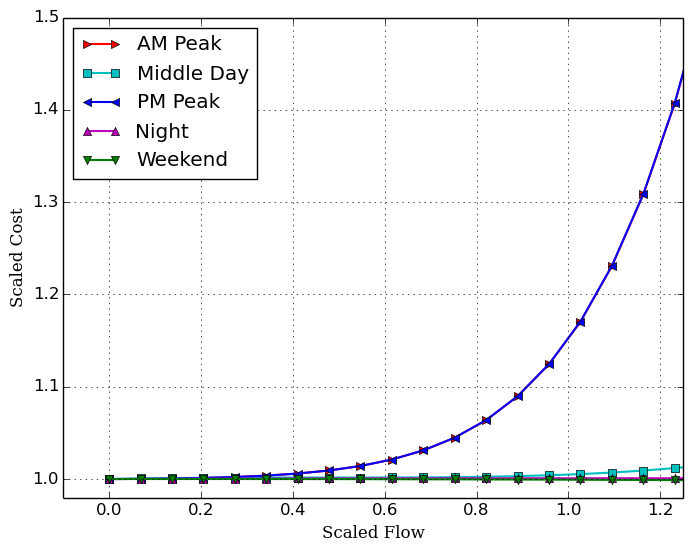

In [4]:
using PyPlot

xs = linspace(0, 1.3, 20)

#true_coeffs = [1, 0, 0, 0, .15]
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#plot(xs, ys_true, "k", label="True")

ys_Oct_AM = map(x->polyEval(coeffs_best_Oct_AM, x), xs)
ys_Oct_MD = map(x->polyEval(coeffs_best_Oct_MD, x), xs)
ys_Oct_PM = map(x->polyEval(coeffs_best_Oct_PM, x), xs)
ys_Oct_NT = map(x->polyEval(coeffs_best_Oct_NT, x), xs)
ys_Oct_weekend = map(x->polyEval(coeffs_best_Oct_weekend, x), xs)

plot(xs, ys_Oct_AM, ">-r", label="AM Peak", linewidth=1.5)
plot(xs, ys_Oct_MD, "s-c", label="Middle Day", linewidth=1.5)
plot(xs, ys_Oct_PM, "<-b", label="PM Peak", linewidth=1.5)
plot(xs, ys_Oct_NT, "^-m", label="Night", linewidth=1.5)
plot(xs, ys_Oct_weekend, "v-g", label="Weekend", linewidth=1.5)

legend(loc="upper left") 

grid("on")
xlim(-0.1, 1.25);
ylim(0.98, 1.5);

font1 = ["family"=>"serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Oct.pdf")

In [5]:
cross_validation_best_key_Oct_AM

"(8,0.5,10000.0,1)"

In [6]:
outfile = open("../temp_files/cost_func_Oct.txt", "w")

write(outfile,"coeffs_Oct_AM: $(coeffs_best_Oct_AM) \n \
coeffs_Oct_MD: $(coeffs_best_Oct_MD) \n \
coeffs_Oct_PM: $(coeffs_best_Oct_PM) \n \
coeffs_Oct_NT: $(coeffs_best_Oct_NT) \n \
coeffs_Oct_weekend: $(coeffs_best_Oct_weekend) \n")

close(outfile)